Consider the differential equation $y'' = \lambda y^4$ defined on the interval $[0,1]$ with boundary conditions $y(0)=y(1)=1$.

It can be shown that as long as $\lambda \in (0,2)$ the sequence of functions $(u_n)$ where successive elements are defined by solving $u_{n}'' = \lambda u_{n-1}^4$ with boundary conditions $u_n(0)=u_n(1)=1$ will converge to the unique solution to the differential equation starting from any initial function $u_0 \in C^0[0,1]$.

Here, we will calculate polynomial approximations to the solution for $\lambda=1$, starting from the constant function $u_0(x) = 1$.

In [1]:
from polyratio import Polynomial, Rational
import matplotlib.pyplot as plt
import numpy as np

In [2]:
_lambda = Rational(1,1,False)

def next_approx(u=Polynomial(1)):
    global _lambda
    u = _lambda * u ** 4
    u = u.integral().integral()
    u = u + Polynomial(1,-u(1))
    return u 

Here, we implement advancing one step in the iterative procedure: an initial function is passed as an argument (by default, the constant function $u_0(x) = 1$) and the second integral of its 4th power is returned.

To solve the boundary conditions, first note that for any polynomial, its value at $x=0$ is its constant term. Since we want $u(0)=1$, the constant term, which is the second integration constant, is always $1$.

Next, at $x=1$, the value of a polynomial is the sum of its coefficients. Since the constant term is $1$, we can say that summing the coefficients of the terms of linear degree and higher terms must yield $0$. The coefficient of the linear term is the first integration constant, so it must be the negative of the sum of all coefficients quadratic and higher. But this is simply the 2nd integral of the initial function, assuming integration constants are zero, evaluated at $x=1$.

In [3]:
_1 = next_approx()
_2 = next_approx(_1)
_3 = next_approx(_2)
_4 = next_approx(_3)
print(_2)

1 - (1027 / 2880)x + (1 / 2)x^2 - (1 / 3)x^3 + (7 / 24)x^4 - (7 / 40)x^5 + (49 / 480)x^6 - (1 / 24)x^7 + (1 / 64)x^8 - (1 / 288)x^9 + (1 / 1440)x^10


In [4]:
x = np.arange(0,1, .01)

y1 = [_1(x[i]) for i in range(len(x))]
y2 = [_2(x[i]) for i in range(len(x))]
y3 = [_3(x[i]) for i in range(len(x))]
y4 = [_4(x[i]) for i in range(len(x))]

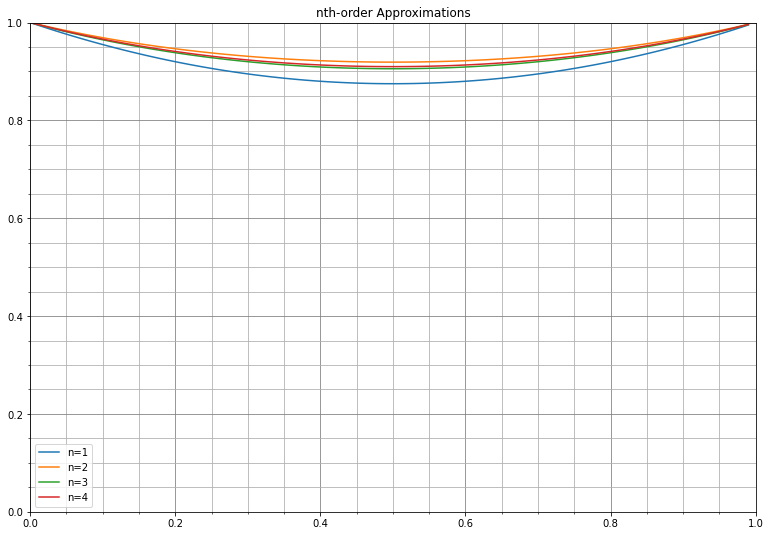

In [5]:
plt.figure(figsize=(13,9))
plt.title('nth-order Approximations')
plt.plot(x, y1, label='n=1')
plt.plot(x, y2, label='n=2')
plt.plot(x, y3, label='n=3')
plt.plot(x, y4, label='n=4')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.minorticks_on()
plt.grid(b=True, which='major', color='gray')
plt.grid(b=True, which='minor')
plt.show()

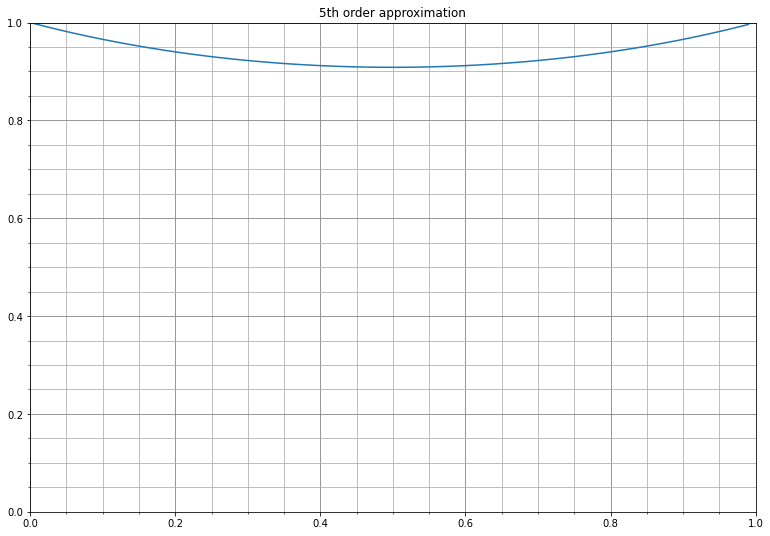

In [6]:
_5 = next_approx(_4)
y5 = [_5(x[i]) for i in range(len(x))]
plt.figure(figsize=(13,9))
plt.title('5th order approximation')
plt.plot(x, y5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.minorticks_on()
plt.grid(b=True, which='major', color='gray')
plt.grid(b=True, which='minor')
plt.show()

In [7]:
with open('5th_approx.txt', 'w') as f1, open('5th_coefficients.txt', 'w') as f2:
    f1.write(str(_5))
    for x in _5:
        s = str(x)
        if '(' in s:
            f2.write(s[1:-1] + '\n')
        else: f2.write(s + '\n')